In [ ]:
import pandas as pd
import sns

# Load your three annotation DataFrames (adjust paths as needed)
no_audio = pd.read_csv('./annotations/per_modality/annotations_no_audio_majority.csv')
with_audio = pd.read_csv('./annotations/per_modality/annotations_with_audio_majority.csv')
only_audio = pd.read_csv('./annotations/per_modality/annotations_only_audio_majority.csv')

# Basic stats: % of laughter per modality
def compute_laughter_stats(df, name):
    total = len(df)
    laugh = df['label'].sum()
    print(f"{name}: {laugh}/{total} = {100 * laugh / total:.2f}% laughter")

compute_laughter_stats(no_audio, "No Audio")
compute_laughter_stats(with_audio, "With Audio")
compute_laughter_stats(only_audio, "Only Audio")

# Merge all three on (video_id, participant, frame)
merged = no_audio.merge(with_audio, on=["video_id", "participant", "frame"], suffixes=('_no', '_with'))
merged = merged.merge(only_audio, on=["video_id", "participant", "frame"])
merged = merged.rename(columns={"label": "label_only"})

# Disagreement: count how many times labels differ
merged['agree_count'] = (merged['label_no'] == merged['label_with']).astype(int) + \
                        (merged['label_no'] == merged['label_only']).astype(int) + \
                        (merged['label_with'] == merged['label_only']).astype(int)

# Agreement distribution
print("\nAgreement among annotators (3 = full agreement, 1 = full disagreement):")
print(merged['agree_count'].value_counts().sort_index())

# Percentage of full agreement vs any disagreement
total = len(merged)
full_agreement = (merged['agree_count'] == 3).sum()
any_disagreement = total - full_agreement
print(f"\nFull agreement: {100 * full_agreement / total:.2f}%")
print(f"Any disagreement: {100 * any_disagreement / total:.2f}%")


No Audio: 73311/8083500 = 0.91% laughter
With Audio: 54158/8145450 = 0.66% laughter
Only Audio: 63709/8141250 = 0.78% laughter


In [3]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv('./annotations/cont/annotations_no_audio_majority_cont.csv')  # reemplaza con tu ruta

# Agrupar por etiqueta y calcular estadísticas
label_stats = df.groupby('label').agg(
    segment_count=('label', 'count'),
    average_duration_s=('duration_s', 'mean'),
    std_duration_s=('duration_s', 'std'),
    min_duration_s=('duration_s', 'min'),
    max_duration_s=('duration_s', 'max'),
    p75_duration_s=('duration_s', lambda x: x.quantile(0.75))
).reset_index()

print(label_stats)

# Asegúrate de que 'duration_s' y 'label' están en el DataFrame
total = len(df[df["label"] == 1])

over_10 = len(df[(df["label"] == 1) & (df["duration_s"] > 10)])
over_5 = len(df[(df["label"] == 1) & (df["duration_s"] > 5)])
over_2 = len(df[(df["label"] == 1) & (df["duration_s"] > 2)])
over_1 = len(df[(df["label"] == 1) & (df["duration_s"] > 1)])

print("Percentage > 10s:", over_10 / total * 100)
print("Percentage > 5s:", over_5 / total * 100)
print("Percentage > 2s:", over_2 / total * 100)
print("Percentage > 1s:", over_1 / total * 100)



   label  segment_count  average_duration_s  std_duration_s  min_duration_s  \
0      0           2504           53.315954       47.924798        0.016667   
1      1           1359            0.899080        1.122359        0.016667   

   max_duration_s  p75_duration_s  
0      120.050000      110.608333  
1       10.783333        1.083333  
Percentage > 10s: 0.14716703458425312
Percentage > 5s: 1.177336276674025
Percentage > 2s: 10.375275938189846
Percentage > 1s: 27.299484915378958


In [ ]:
import pandas as pd
df_annotations_no_audio_majority_cont = pd.read_csv('annotations/cont/annotations_no_audio_majority_cont.csv')
df_annotations_no_audio_majority_cont

,video_id,segment,participant,start_frame,end_frame,start_time,end_time,duration_s,label
0,vid2,seg7,1,0,3394,0.000000,56.566667,56.583333,0
1,vid2,seg7,1,3395,3419,56.583333,56.983333,0.416667,1
2,vid2,seg7,1,3420,7199,57.000000,119.983333,63.000000,0
3,vid2,seg7,2,0,7199,0.000000,119.983333,120.000000,0
4,vid2,seg7,3,0,7199,0.000000,119.983333,120.000000,0
...,...,...,...,...,...,...,...,...,...
3858,vid5,seg2,49,232,365,3.866667,6.083333,2.233333,1
3859,vid5,seg2,49,366,932,6.100000,15.533333,9.450000,0
3860,vid5,seg2,49,933,1089,15.550000,18.150000,2.616667,1
3861,vid5,seg2,49,1090,7200,18.166667,120.000000,101.850000,0


In [4]:
import pandas as pd

df = pd.read_csv('./annotations/per_modality/annotations_no_audio_majority.csv')

count = (df["label"] == 1).sum()
print(count)


73311


In [8]:
df = pd.read_csv('features/fixed_really/no_audio/features_no_audio_1s.csv')

count = (df["label"] == 1).sum()


print(count / len(df))

0.008789343460498302


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Define your files and segmentation names
files = [
    ("Centered", "./centered.csv"),
    ("Sliding", "./sliding.csv"),
    ("Padded", "./padded.csv")
]

# Define column names based on structure
column_names = [
    "index", "train_modality", "test_modality", "Window",
    "accuracy", "F1_macro", "Precision_1", "Recall_1",
    "f1_1", "y_te_positives", "feature_importances"
]

# Iterate over each segmentation type
for seg_name, file_path in files:
    # Load file and assign column names
    df = pd.read_csv(file_path, header=None)
    df.columns = column_names
    df["segmentation"] = seg_name

    # Create modality type column
    df["modality_type"] = df.apply(
        lambda row: "Intra" if row["train_modality"] == row["test_modality"] else "Inter",
        axis=1
    )

    # Ensure numeric rounding
    for col in ["F1_macro", "Precision_1", "Recall_1"]:
        df[col] = pd.to_numeric(df[col], errors="coerce").round(3)

    # Plot each metric
    for metric in ["F1_macro", "Precision_1", "Recall_1"]:
        plt.figure(figsize=(8, 5))
        for modality in ["Intra", "Inter"]:
            subset = df[df["modality_type"] == modality]
            grouped = subset.groupby("Window")[metric].mean().reset_index()
            shift = -0.15 if modality == "Intra" else 0.15
            plt.bar(
                grouped["Window"] + shift,
                grouped[metric],
                width=0.3,
                label=modality
            )

        plt.ylim(0, 1)
        plt.xticks([1, 2, 10])
        plt.xlabel("Window Size (s)")
        plt.ylabel(metric.replace("_", " "))
        plt.title(f"{metric.replace('_', ' ')} – {seg_name}")
        plt.legend()
        plt.tight_layout()
        plt.savefig(f"{seg_name.lower()}_{metric.lower()}.png")
        plt.close()


In [7]:
import pandas as pd

# Load raw centered.csv
df = pd.read_csv("./centered.csv", header=None)

# Assign known column names
df.columns = [
    "index", "train_modality", "test_modality", "Window",
    "accuracy", "F1_macro", "Precision_1", "Recall_1",
    "f1_1", "y_te_positives", "feature_importances"
]

# Preview and proceed with intra/inter comparison
print(df[["train_modality", "test_modality", "Window", "F1_macro", "Precision_1", "Recall_1"]].head())


  train_modality test_modality  Window  F1_macro  Precision_1  Recall_1
0     with_audio    with_audio       1  0.509984     0.363636  0.190476
1     with_audio      no_audio       1  0.534149     0.393401  0.275311
2     with_audio    only_audio       1  0.529194     0.379699  0.307692
3       no_audio    with_audio       1  0.532084     0.352306  0.356151
4       no_audio      no_audio       1  0.532160     0.401130  0.252669


In [21]:
import pandas as pd

# Load your CSVs from current directory
centered_df = pd.read_csv("./centered_clean.csv")
padded_df = pd.read_csv("./padded_clean.csv")
sliding_df = pd.read_csv("./sliding_clean.csv")

# Merge all intra-modality rows and add segmentation info
def process(df, label):
    df = df[df["train_mod"] == df["test_mod"]][["train_mod", "win_size", "f1_macro", "precision_1", "recall_1"]].copy()
    df["Segmentation"] = label
    return df

df = pd.concat([
    process(centered_df, "Centered"),
    process(padded_df, "Padded"),
    process(sliding_df, "Sliding")
])

# Rename and reorder
df = df.rename(columns={
    "train_mod": "Modality",
    "win_size": "Window",
    "f1_macro": "F1_macro",
    "precision_1": "Precision_1",
    "recall_1": "Recall_1"
})
df = df[["Modality", "Segmentation", "Window", "F1_macro", "Precision_1", "Recall_1"]]

# Round and prepare for LaTeX
df[["F1_macro", "Precision_1", "Recall_1"]] = df[["F1_macro", "Precision_1", "Recall_1"]].round(3)

# Build LaTeX rows with bold max F1_macro
latex_rows = []
for modality in df["Modality"].unique():
    subset = df[df["Modality"] == modality].copy()
    max_f1 = subset["F1_macro"].max()

    for i, row in subset.iterrows():
        f1 = f"\\textbf{{{row['F1_macro']}}}" if row["F1_macro"] == max_f1 else f"{row['F1_macro']}"
        p1 = f"{row['Precision_1']}"
        r1 = f"{row['Recall_1']}"

        mod = modality if i == subset.index[0] else ""
        seg = row["Segmentation"] if mod else " " * 10
        latex_rows.append(f"  & {seg} & {int(row['Window'])} & {f1} & {p1} & {r1} \\\\" if mod == "" else
                          f"\\multirow{{9}}{{*}}{{{mod}}} & {seg} & {int(row['Window'])} & {f1} & {p1} & {r1} \\\\")

# Build LaTeX table
latex_table = r"""\begin{table}[H]
\centering
\footnotesize
\begin{tabular}{llc|ccc}
\toprule
\textbf{Modality} & \textbf{Segmentation} & \textbf{Window (s)} & \textbf{F1\textsubscript{macro}} & \textbf{Precision\textsubscript{1}} & \textbf{Recall\textsubscript{1}} \\
\midrule
""" + "\n".join(latex_rows) + r"""
\bottomrule
\end{tabular}
\caption{Intra-modality classification scores grouped by modality and segmentation strategy. Highest F1\textsubscript{macro} per modality in bold.}
\label{tab:intra_modality_pretty}
\end{table}
"""

# Output LaTeX
print(latex_table)


\begin{table}[H]
\centering
\footnotesize
\begin{tabular}{llc|ccc}
\toprule
\textbf{Modality} & \textbf{Segmentation} & \textbf{Window (s)} & \textbf{F1\textsubscript{macro}} & \textbf{Precision\textsubscript{1}} & \textbf{Recall\textsubscript{1}} \\
\midrule
\multirow{9}{*}{with_audio} & Centered & 1 & 0.51 & 0.364 & 0.19 \\
  &            & 2 & 0.523 & 0.408 & 0.194 \\
  &            & 10 & 0.526 & 0.383 & 0.226 \\
\multirow{9}{*}{with_audio} & Padded & 1 & 0.703 & 0.365 & 0.792 \\
  &            & 2 & 0.717 & 0.383 & 0.834 \\
  &            & 10 & \textbf{0.946} & 0.825 & 1.0 \\
\multirow{9}{*}{with_audio} & Sliding & 1 & 0.703 & 0.365 & 0.792 \\
  &            & 2 & 0.717 & 0.383 & 0.834 \\
  &            & 10 & \textbf{0.946} & 0.825 & 1.0 \\
\multirow{9}{*}{no_audio} & Centered & 1 & 0.532 & 0.401 & 0.253 \\
  &            & 2 & 0.549 & 0.409 & 0.313 \\
  &            & 10 & 0.551 & 0.401 & 0.345 \\
\multirow{9}{*}{no_audio} & Padded & 1 & 0.656 & 0.301 & 0.811 \\
  &            

In [22]:
import pandas as pd

# Load CSVs
centered = pd.read_csv("./centered_clean.csv")
sliding = pd.read_csv("./sliding_clean.csv")

# Filter intra-modality rows only
centered_filtered = centered[centered["train_mod"] == centered["test_mod"]].sort_values(
    by=["train_mod", "win_size"]
).reset_index(drop=True)

sliding_filtered = sliding[sliding["train_mod"] == sliding["test_mod"]].sort_values(
    by=["train_mod", "win_size"]
).reset_index(drop=True)

# Compare
are_equal = centered_filtered.equals(sliding_filtered)

print("Are Centered and Sliding intra-modality results the same?", are_equal)

# If not equal, show differences
if not are_equal:
    comparison = centered_filtered.copy()
    comparison["sliding_f1"] = sliding_filtered["f1_macro"]
    comparison["diff"] = comparison["f1_macro"] != comparison["sliding_f1"]
    print("\nDifferences in f1_macro:")
    print(comparison[comparison["diff"]])


Are Centered and Sliding intra-modality results the same? False

Differences in f1_macro:
   index   train_mod    test_mod  win_size  accuracy  f1_macro  precision_1  \
0      4    no_audio    no_audio         1  0.637615  0.532160     0.401130   
1     13    no_audio    no_audio         2  0.633028  0.549214     0.409302   
2     22    no_audio    no_audio        10  0.622706  0.550743     0.400826   
3      8  only_audio  only_audio         1  0.617706  0.507623     0.367347   
4     17  only_audio  only_audio         2  0.597586  0.490322     0.328571   
5     26  only_audio  only_audio        10  0.592555  0.484553     0.317536   
6      0  with_audio  with_audio         1  0.647922  0.509984     0.363636   
7      9  with_audio  with_audio         2  0.665037  0.523334     0.408333   
8     18  with_audio  with_audio        10  0.649144  0.525950     0.382550   

   recall_1      f1_1  sliding_f1  diff  
0  0.252669  0.310044    0.655829  True  
1  0.313167  0.354839    0.710241  

In [26]:
import pandas as pd

# Load your CSV files
centered_df = pd.read_csv("./centered_clean.csv")
padded_df = pd.read_csv("./padded_clean.csv")
sliding_df = pd.read_csv("./sliding_clean.csv")

# Define a function to extract intra-modality scores from one dataframe
def extract_intra_scores(df, segmentation_name):
    # Keep only rows where train_mod == test_mod
    df = df[df['train_mod'] == df['test_mod']].copy()
    df['segmentation'] = segmentation_name
    df = df[['train_mod', 'win_size', 'segmentation', 'f1_macro', 'precision_1', 'recall_1']]
    df = df.rename(columns={'train_mod': 'modality'})
    return df

# Apply to each segmentation strategy
centered_scores = extract_intra_scores(centered_df, "centered")
padded_scores = extract_intra_scores(padded_df, "padded")
sliding_scores = extract_intra_scores(sliding_df, "sliding")

# Combine into one table
intra_modality_scores = pd.concat([centered_scores, padded_scores, sliding_scores], ignore_index=True)

# Optional: display or export
print(intra_modality_scores)
# intra_modality_scores.to_csv("intra_modality_scores.csv", index=False)


      modality  win_size segmentation  f1_macro  precision_1  recall_1
0   with_audio         1     centered  0.509984     0.363636  0.190476
1     no_audio         1     centered  0.532160     0.401130  0.252669
2   only_audio         1     centered  0.507623     0.367347  0.219512
3   with_audio         2     centered  0.523334     0.408333  0.194444
4     no_audio         2     centered  0.549214     0.409302  0.313167
5   only_audio         2     centered  0.490322     0.328571  0.210366
6   with_audio        10     centered  0.525950     0.382550  0.226190
7     no_audio        10     centered  0.550743     0.400826  0.345196
8   only_audio        10     centered  0.484553     0.317536  0.204268
9   with_audio         1       padded  0.625845     0.257225  0.261765
10    no_audio         1       padded  0.654478     0.330846  0.305747
11  only_audio         1       padded  0.650261     0.266553  0.373810
12  with_audio         2       padded  0.747166     0.454545  0.563910
13    

In [28]:
import pandas as pd

# Load your CSV files
centered_df = pd.read_csv("./centered_clean.csv")
padded_df = pd.read_csv("./padded_clean.csv")
sliding_df = pd.read_csv("./sliding_clean.csv")

# Define a function to extract inter-modality scores with full modality info
def extract_cross_scores(df, segmentation_name):
    df = df[df['train_mod'] != df['test_mod']].copy()
    df['modality_pair'] = df['train_mod'] + " → " + df['test_mod']
    df['segmentation'] = segmentation_name
    df = df[['modality_pair', 'win_size', 'segmentation', 'f1_macro', 'precision_1', 'recall_1']]
    return df

# Apply to each segmentation strategy
centered_scores = extract_cross_scores(centered_df, "centered")
padded_scores = extract_cross_scores(padded_df, "padded")
sliding_scores = extract_cross_scores(sliding_df, "sliding")

# Combine into one DataFrame
cross_modality_scores = pd.concat([centered_scores, padded_scores, sliding_scores], ignore_index=True)

# Optional: display or export
print(cross_modality_scores)
# cross_modality_scores.to_csv("cross_modality_scores_full_label.csv", index=False)


              modality_pair  win_size segmentation  f1_macro  precision_1  \
0     with_audio → no_audio         1     centered  0.534149     0.393401   
1   with_audio → only_audio         1     centered  0.529194     0.379699   
2     no_audio → with_audio         1     centered  0.532084     0.352306   
3     no_audio → only_audio         1     centered  0.519881     0.358114   
4   only_audio → with_audio         1     centered  0.538265     0.376756   
5     only_audio → no_audio         1     centered  0.519242     0.376224   
6     with_audio → no_audio         2     centered  0.543962     0.404562   
7   with_audio → only_audio         2     centered  0.529589     0.382239   
8     no_audio → with_audio         2     centered  0.525359     0.341506   
9     no_audio → only_audio         2     centered  0.530088     0.369376   
10  only_audio → with_audio         2     centered  0.532301     0.372442   
11    only_audio → no_audio         2     centered  0.537629     0.406757   

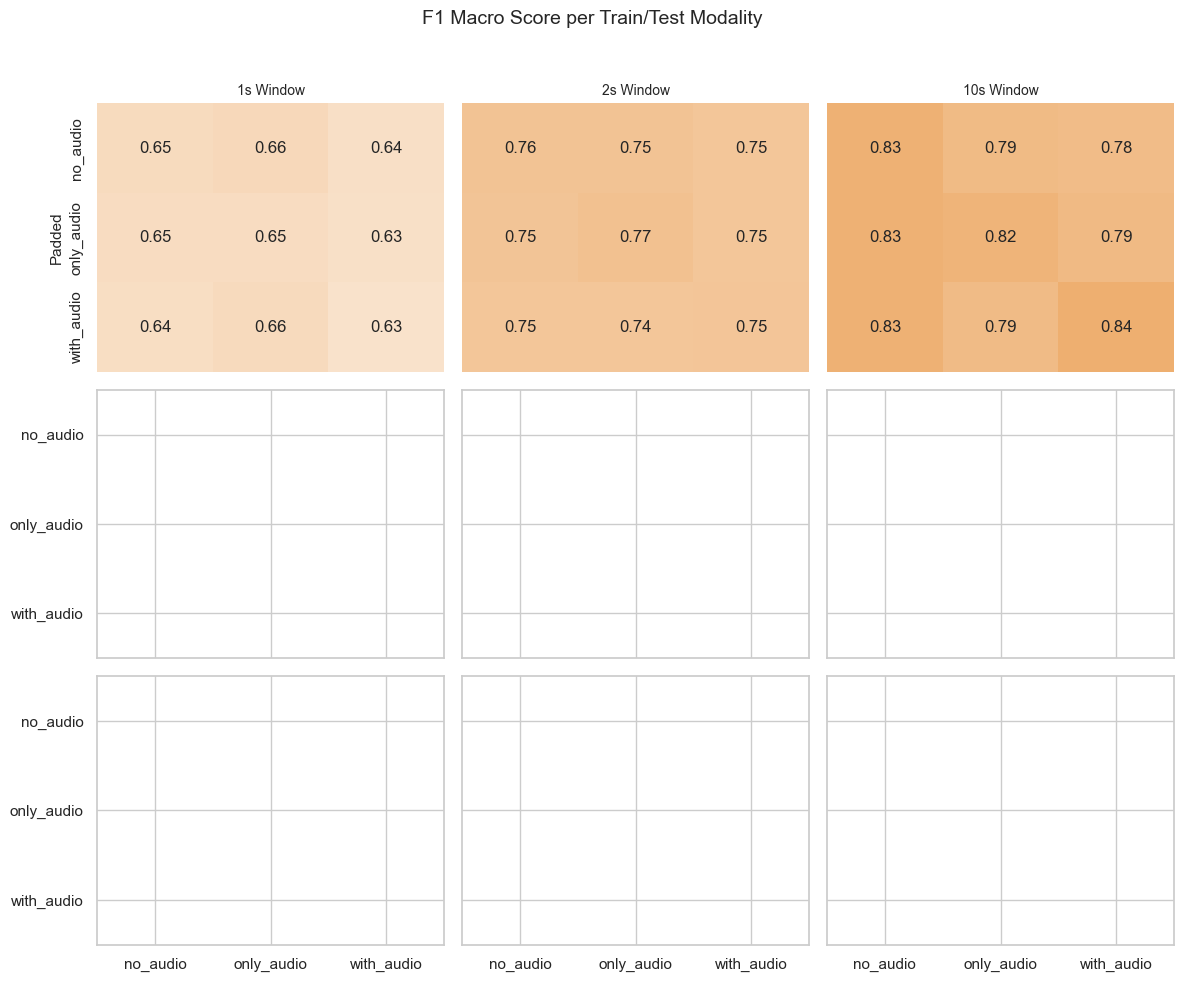

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

modalities = [ "padded"]
window_sizes = [1, 2, 10]

# Crear figura y ejes (3 filas x 3 columnas)
fig, axes = plt.subplots(3, 3, figsize=(12, 10), sharex=True, sharey=True)

# Colormap y normalización
cmap = LinearSegmentedColormap.from_list("white_to_orange", ["#ffffff", "#e68a2e"])
norm = Normalize(vmin=0.5, vmax=1.0)

# Llenar cada subplot
for row_idx, mod in enumerate(modalities):
    df = pd.read_csv(f"./{mod}_clean.csv")
    for col_idx, win_size in enumerate(window_sizes):
        ax = axes[row_idx, col_idx]
        subset = df[df["win_size"] == win_size]
        pivot = subset.pivot(index="train_mod", columns="test_mod", values="f1_macro")

        sns.heatmap(
            pivot, ax=ax, cmap=cmap, norm=norm, annot=True, fmt=".2f",
            cbar=False
        )

        # Column titles (top row)
        if row_idx == 0:
            ax.set_title(f"{win_size}s Window", fontsize=10)

        # Row labels (left column only)
        if col_idx == 0:
            ax.set_ylabel(f"{mod.capitalize()}", fontsize=11)
        else:
            ax.set_ylabel("")

        # Remove x-axis label
        ax.set_xlabel("")

# Layout final
plt.suptitle("F1 Macro Score per Train/Test Modality", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [22]:
import pandas as pd
import itertools

# Cargar el CSV
df = pd.read_csv("./sliding_clean.csv")

# Obtener los valores únicos de cada dimensión
win_sizes = df["win_size"].unique()
train_mods = df["train_mod"].unique()
test_mods = df["test_mod"].unique()

# Generar todas las combinaciones posibles
combinations = list(itertools.product(win_sizes, train_mods, test_mods))

# Buscar cuáles combinaciones no existen en el dataframe
missing = []
for win, train, test in combinations:
    subset = df[(df["win_size"] == win) & (df["train_mod"] == train) & (df["test_mod"] == test)]
    if subset.empty:
        missing.append((win, train, test))

# Mostrar resultados
print(f"Total missing combinations: {len(missing)}")
for m in missing:
    print(f"Missing: win_size={m[0]}, train_mod={m[1]}, test_mod={m[2]}")


Total missing combinations: 0


In [25]:
import pandas as pd

# Carga el archivo CSV
df = pd.read_csv("./segmentation_train_test_sliding_summary.csv")

# Muestra los nombres de las columnas
print(df.columns.tolist())


['modality', 'duration_s', 'train_segmentation', 'test_segmentation', 'accuracy', 'f1_macro', 'precision_1', 'recall_1', 'f1_1', 'y_te_positives']


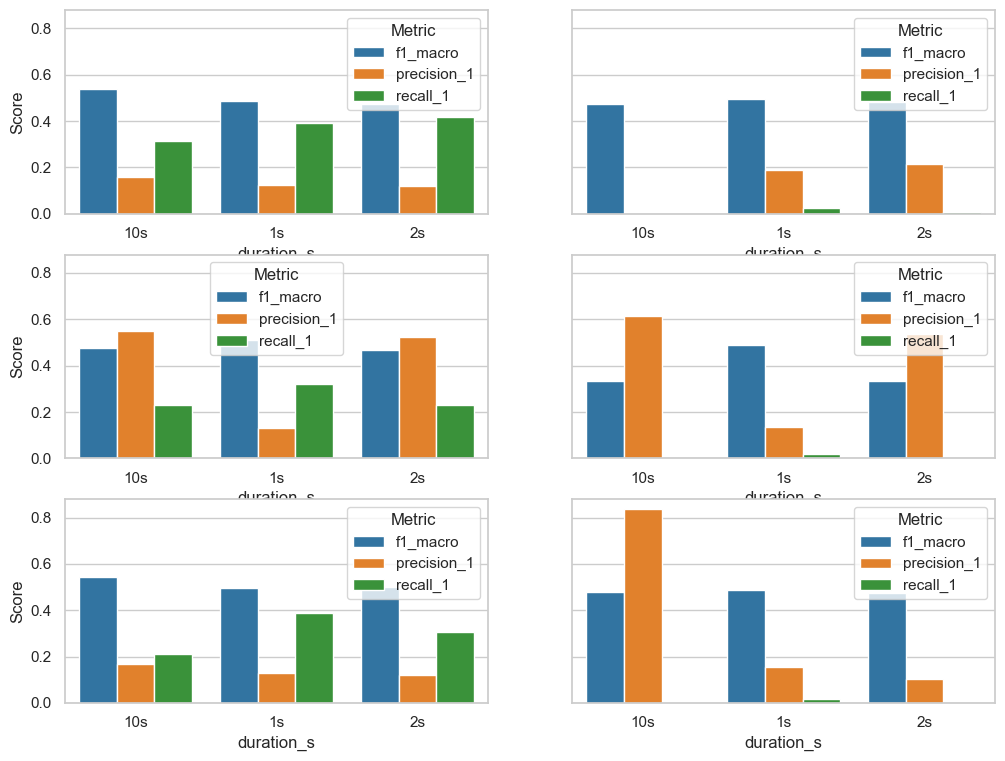

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV
df = pd.read_csv("./segmentation_train_test_sliding_summary.csv")

# Asegurar formato correcto de duración
df["duration_s"] = df["duration_s"].astype(str).str.strip() + "s"

# Agrupar métricas por modalidad, segmentación y duración
grouped = df.groupby(["modality", "train_segmentation", "duration_s"]).agg({
    "f1_macro": "mean",
    "precision_1": "mean",
    "recall_1": "mean"
}).reset_index()

# Reorganizar a formato largo
melted = pd.melt(
    grouped,
    id_vars=["modality", "train_segmentation", "duration_s"],
    value_vars=["f1_macro", "precision_1", "recall_1"],
    var_name="Metric",
    value_name="Score"
)

# Orden específico
mod_order = ["no_audio", "only_audio", "with_audio"]
seg_order = ["centered", "padded"]
duration_order = ["1s", "2s", "10s"]
metric_order = ["f1_macro", "precision_1", "recall_1"]

# Estilo
sns.set(style="whitegrid")
palette = {
    "f1_macro": "#1f77b4",
    "precision_1": "#ff7f0e",
    "recall_1": "#2ca02c"
}

# Crear figura 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 9), sharey=True)

# Plot por combinación
for i, mod in enumerate(mod_order):
    for j, seg in enumerate(seg_order):
        ax = axes[i, j]
        subset = melted[(melted["modality"] == mod) & (melted["train_segmentation"] == seg)]

        if subset.empty:
            ax.set_visible(False)
            continue

        sns.barplot(
            data=subset,
            x="duration_s",
            y="Score",
            hue="Metric",
            hue_order=metric_order,
            palette=palette,
            ax=ax
        )
